# Evaluation Pipeline

El objetivo de este pipeline es validar las preguntas generadas por el generador de preguntas con Graph RAG y compararlas contra las preguntas que genero un experto en la materia para determinar el coverage que la solución tiene comparado al experto. 

Se estudia en profunidad una sección del documento ESS 3 del ESS Framework, primero se pidio al SME generar las preguntas que el haría para validar compliance sobre esta sección del ESS Framework, para luego comparar contra las generadas por GraphRAG en un pipeline de evaluación.  

## Preguntas del experto 

Esta sección contiene las preguntas que el experto selecciono como interrogantes a la hora de intepretar una sección del documento del ESS Framework.  

Resource Efficiency

1. Energy Efficiency: What measures are in place to ensure the efficient use of energy in mining operations? Are there any energy-saving technologies or practices being implemented?

2. Water Management: How is water usage monitored and managed to ensure efficiency? Are there any systems in place for recycling or reusing water within the mining operations?

3. Raw Material Usage: What steps are being taken to optimize the use of raw materials and minimize waste? Are there any benchmarking data available to compare the mine's resource efficiency with industry standards?
 

Pollution Prevention

4. Air Quality Management: What measures are in place to monitor and control air emissions, including greenhouse gases and particulate matter, from mining activities?

5. Water Pollution Control: How is wastewater from mining operations treated before being discharged? Are there any measures to prevent contamination of local water bodies?

6. Soil and Land Management: What practices are in place to prevent soil erosion and land degradation due to mining activities? Are there any land reclamation plans post-mining?


Waste Management

7. Hazardous Waste Management: How is hazardous waste generated by the mine identified, stored, and disposed of? Are there any protocols for handling spills or accidental releases?

8. Non-Hazardous Waste Management: What systems are in place for the management of non-hazardous waste, including recycling and reduction initiatives?

In [31]:
expert_questions = [
    "Energy Efficiency: What measures are in place to ensure the efficient use of energy in mining operations?",
    "Energy Efficiency:Are there any energy-saving technologies or practices being implemented?",
    "Water Management: How is water usage monitored and managed to ensure efficiency?",
    "Water Management:Are there any systems in place for recycling or reusing water within the mining operations?",
    "Raw Material Usage: What steps are being taken to optimize the use of raw materials and minimize waste?",
    "Raw Material Usage: Are there any benchmarking data available to compare the mine's resource efficiency with industry standards?",
    "Air Quality Management: What measures are in place to monitor and control air emissions, including greenhouse gases and particulate matter, from mining activities?",
    "Water Pollution Control: How is wastewater from mining operations treated before being discharged?",
    "Water Pollution Control:Are there any measures to prevent contamination of local water bodies?",
    "Soil and Land Management: What practices are in place to prevent soil erosion and land degradation due to mining activities?",
    "Soil and Land Management: Are there any land reclamation plans post-mining?",
    "Hazardous Waste Management: How is hazardous waste generated by the mine identified, stored, and disposed of?",
    "Hazardous Waste Management: Are there any protocols for handling spills or accidental releases?",
    "Non-Hazardous Waste Management: What systems are in place for the management of non-hazardous waste, including recycling and reduction initiatives?",
]


In [32]:
expert_questions[0]

'Energy Efficiency: What measures are in place to ensure the efficient use of energy in mining operations?'

## Generación de Preguntas por el pipeline automático

In [4]:
import requests
import json

# Vamos a generar una query al endpoint de http://localhost:6000/questions-from-standard para obtener las preguntas de un estándar en particular

# Definimos el endpoint
url = "http://localhost:6000/questions-from-standard"

# Realizamos la petición
response = requests.get(url)

In [5]:
questions = json.loads(response.text)
questions = questions["questions"]
questions[0:4]

['1. Has the borrower assessed the use of hazardous materials for project activities?',
 '2. Does the project involve significant pest management issues?',
 "3. Has the borrower considered the project's proximity to areas of importance to biodiversity?",
 '4. What measures has the borrower adopted to mitigate environmental impacts?']

In [23]:
import sys
import os

print(os.getcwd())

os.chdir("../")
print(os.getcwd())

# Assuming the notebook is inside the 'notebooks' directory and 'src' is one level up
# Add the src directory to the sys.path
module_path = os.path.abspath(os.path.join("..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Now you can import your modules
from config import config  # This should import from src/config/__init__.py
from models import Models  # This should import from src/models.py


c:\Users\scruple077\Documents\GitHub\msc-ort-uy-thesis\services\question-generator
c:\Users\scruple077\Documents\GitHub\msc-ort-uy-thesis\services


In [24]:
import sys
import os

# Add the src directory to the sys.path
# sys.path.append(os.path.abspath(os.path.join("..", "src")))

# Ensure the root directory is in the system path for module imports
sys.path.append("")

# Add the 'src' directory to the system path to enable importing from modules
module_path = os.path.abspath(os.path.join("....", "question-generator"))
if module_path not in sys.path:
    sys.path.append(module_path)


# Now you can import your modules
import config
from models import Models

### Inicializo LLM model y embeddings

In [25]:
llm, embed_model = Models.initialize_models()

embed_model.get_text_embedding("Open AI new Embeddings models is great.")

[-0.014704804867506027,
 0.010918455198407173,
 -0.0006071067182347178,
 -0.030538631603121758,
 0.0034249252639710903,
 0.010739464312791824,
 -0.004226943012326956,
 -0.0016599701484665275,
 -0.003548842156305909,
 -0.04466515779495239,
 0.006722491700202227,
 0.029299462214112282,
 0.0084883077070117,
 -0.007262906990945339,
 -0.022566644474864006,
 0.01674254983663559,
 0.025237740948796272,
 0.0262979194521904,
 0.012550028041005135,
 -0.007724153343588114,
 -0.015517149120569229,
 0.0038035602774471045,
 -0.005944569129496813,
 -0.02101079747080803,
 -0.0020205338951200247,
 0.009624212048947811,
 0.01671501249074936,
 -0.01989554613828659,
 -0.00947964284569025,
 -0.0244529340416193,
 0.016549790278077126,
 0.018477385863661766,
 -0.01480118464678526,
 -0.02205720730125904,
 -0.00883940514177084,
 0.013493172824382782,
 0.011379702016711235,
 -0.018656376749277115,
 0.01882159896194935,
 0.0065744798630476,
 0.00863287691026926,
 0.001929317251779139,
 0.00910100806504488,
 -0.0

In [26]:
from llama_index.core import Document
from llama_index.core import VectorStoreIndex
from llama_index.core.retrievers import VectorIndexRetriever

docs = [Document(text=question) for question in expert_questions]

index = VectorStoreIndex.from_documents(docs)

In [27]:
query_engine = index.as_query_engine()


response = query_engine.query("query string")

response

Response(response="To monitor and control air emissions, including greenhouse gases and particulate matter, from mining activities, measures are in place to ensure effective air quality management. Steps are also being taken to optimize the use of raw materials and minimize waste. Additionally, benchmarking data may be available to compare the mine's resource efficiency with industry standards.", source_nodes=[NodeWithScore(node=TextNode(id_='c1104e55-2e66-4e99-8fdc-1b294d819cb8', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='3ea5819a-8fa8-4ac3-bfc9-1b1c29bf6e96', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='6474451e06d08dd0eecc00e5224f56c551e2ec03688efc420889a13a22b8238f')}, text='Air Quality Management: What measures are in place to monitor and control air emissions, including greenhouse gases and particulate matter, from mining activities?', mimetype='te

In [28]:
# configure retriever
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=2,
)

nodes = retriever.retrieve("Pollution Control")
nodes

[NodeWithScore(node=TextNode(id_='0189abd6-3654-48cf-bf8d-bc31b3f9caa8', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='ecb9d9c7-4bbe-4115-bd16-10f0df886ac9', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='e12e8eeb7243532970caa3ab4015ff913212e30e9350ee42dd7c7ad3c1c334a7')}, text='Water Pollution Control: How is wastewater from mining operations treated before being discharged? Are there any measures to prevent contamination of local water bodies?', mimetype='text/plain', start_char_idx=0, end_char_idx=169, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=0.8502070055655155),
 NodeWithScore(node=TextNode(id_='c1104e55-2e66-4e99-8fdc-1b294d819cb8', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeIn

In [29]:
nodes = retriever.retrieve(questions[1])
print(questions[1])
print(nodes)

2. Does the project involve significant pest management issues?
[NodeWithScore(node=TextNode(id_='c1104e55-2e66-4e99-8fdc-1b294d819cb8', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='3ea5819a-8fa8-4ac3-bfc9-1b1c29bf6e96', node_type=<ObjectType.DOCUMENT: '4'>, metadata={}, hash='6474451e06d08dd0eecc00e5224f56c551e2ec03688efc420889a13a22b8238f')}, text='Air Quality Management: What measures are in place to monitor and control air emissions, including greenhouse gases and particulate matter, from mining activities?', mimetype='text/plain', start_char_idx=0, end_char_idx=163, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=0.7964835332841128), NodeWithScore(node=TextNode(id_='8a9abbc5-fecb-444c-9dbd-0d8b10a6c19c', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], rel

In [51]:
prompt = """ You are a question validator agent. You are going to recieve pairs of questions generated
            and you have to determine if the question is questions of the context provided, if they are spelled 
            differently but the meaning is similar you should mark them as included. 
             If the question is not included in the list of questions in the context, you have to mark it as not included.
             If the question is included in the questions in the context, you have to mark it as included.
             You should answer with 'included' or 'not included' """


for question in questions:
    validation = query_engine.query(prompt + r"\n\n" + question)
    print(question)
    print(validation)

1. Has the borrower assessed the presence and impact of hazardous materials for all project activities?
not included
2. Does the project involve significant pest management issues, and if so, has a Pest Management Plan (PMP) been prepared?
not included
3. Are there any historical pollution issues associated with the project site?
not included
4. What specific activities is the project contemplating, and have their environmental impacts been evaluated?
not included
5. How close is the project to areas of importance to biodiversity, and what measures are being taken to mitigate any potential impacts?
not included
6. Is the borrower complying with all relevant environmental requirements and regulations?
not included
7. What steps are being taken to minimize the release of hazardous materials during the project?
Not included
8. How will the borrower dispose of waste generated by the project, and are these methods environmentally sound?
not included
9. What measures are in place to avoid or

## Evaluacion por Similiridad de coseno

In [35]:
import numpy as np

embedded_queries = all_result_df.copy()
embedded_queries["chunk_emb"] = all_result_df["chunk"].apply(
    lambda x: np.squeeze(
        cached_langchain_openai_embeddings(chunk=x, cache=embeddings_cache)
    )
)
embedded_queries["question_emb"] = all_result_df["question"].apply(
    lambda x: np.squeeze(
        cached_langchain_openai_embeddings(chunk=x, cache=embeddings_cache)
    )
)

NameError: name 'all_result_df' is not defined

In [33]:
import numpy as np


def cossim(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))


# embedded_queries["cossim"] = embedded_queries.apply(
#     lambda row: cossim(row["question_emb"], row["chunk_emb"]), axis=1
# )

In [34]:
scores = embedded_queries["cossim"].to_list()
plt.hist(scores, bins=5)

NameError: name 'embedded_queries' is not defined

In [36]:
expert_questions_embeddings = [
    embed_model.get_text_embedding(question) for question in expert_questions
]


In [37]:
questions_embeddings = [
    embed_model.get_text_embedding(question) for question in questions
]


In [38]:
import pandas as pd

# Initialize an empty DataFrame to store similarities
similarity_df = pd.DataFrame(index=questions, columns=expert_questions)

# Calculate cosine similarity for each pair
for i, question_emb in enumerate(questions_embeddings):
    for j, expert_question_emb in enumerate(expert_questions_embeddings):
        similarity = cossim(question_emb, expert_question_emb)
        similarity_df.iloc[i, j] = similarity

                                                   Energy Efficiency: What measures are in place to ensure the efficient use of energy in mining operations?  \
1. Has the borrower assessed the use of hazardo...                                           0.797846                                                          
2. Does the project involve significant pest ma...                                           0.773319                                                          
3. Has the borrower considered the project's pr...                                           0.776856                                                          
4. What measures has the borrower adopted to mi...                                           0.810632                                                          
5. Has the borrower considered the remaining as...                                           0.782438                                                          
6. What steps has the borrower taken to 

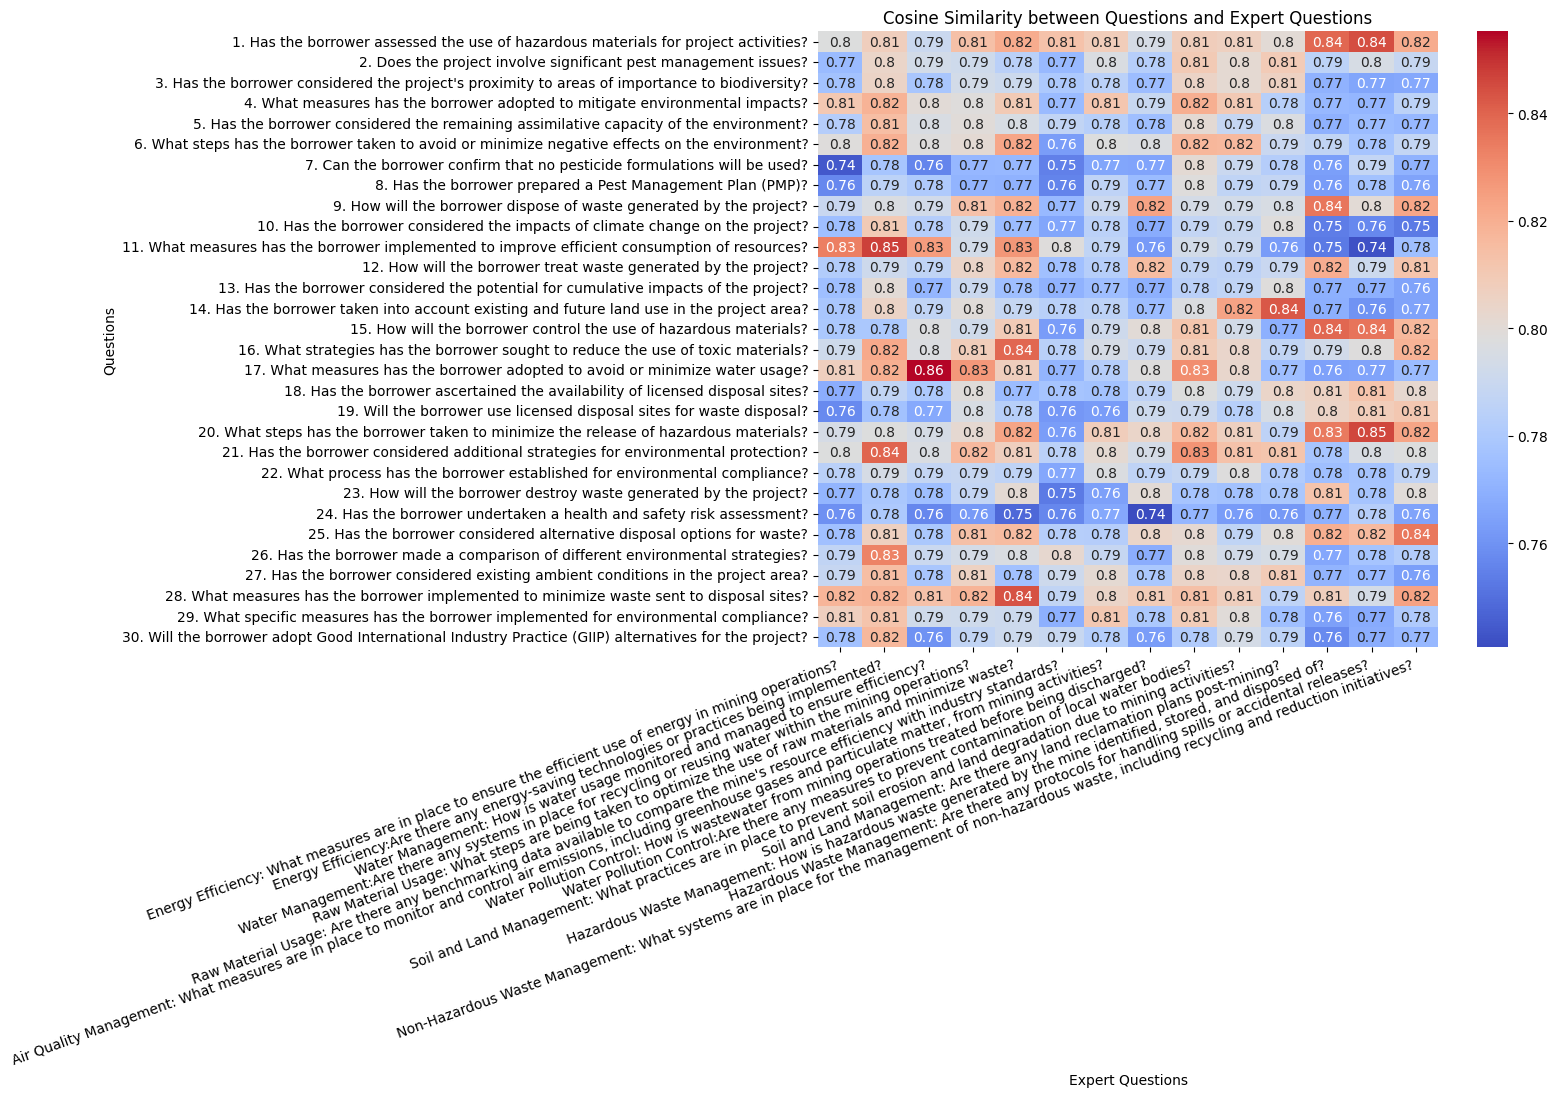

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the DataFrame
print(similarity_df)

# Display as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.astype(float), annot=True, cmap="coolwarm")
plt.title("Cosine Similarity between Questions and Expert Questions")
plt.xlabel("Expert Questions")
plt.ylabel("Questions")
plt.xticks(rotation=20, ha="right")  # Rotate x-axis labels
plt.show()

- Separar las preguntas del experto 
- Separar por tema Tema  

- Setear un threshold de por ejemplo 0.84, si con 0.84 (o directamente un top 3) encuentro preguntas similares entonces digo que la pregunta esta cubierta. O pasarselos a un LLM-as-a-judge para que determine si la pregunta esta cubierta con las preguntas generadas por el LLM. O verificar con el experto